# Semestrální práce 2

In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
from MWSATInstance import MWSATInstance
from MWSATSolution import MWSATSolution
from simulated_annealing import simulated_annealing
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# 1) Ukázka implementace
Implementace programové reprezentace MWSAt instancí je v souboru MWSATInstance.py. Jsou uchovávány jednodlivé klauzule a proměnné jsou reprezenovány stejně jako ve vstupním souboru. Pro efektivní práci dále třída MWSATInstance uchovává pro každou proměnnou klauzule v kterých je obsažena.

Pojďme se jen rychle podívat na reprezentaci následujícího souboru:

> c This Formular is generated by mcnf \
> c \
> c    horn? no  \
> c    forced? no  \
> c    mixed sat? no  \
> c    clause length = 3  \
> c \
> c SAT instance uf20-91/uf20-01.cnf \
> p mwcnf 20 91 \
> w 272 39 39 194 1 194 1 78 117 156 39 1 233 311 311 1 311 39 39 311 0 \
> c range 100 1500 straight \
>  4 -18 19 0 \
> 3 18 -5 0 \
> -5 -8 -15 0 \
> -20 7 -16 0 \
> 10 -13 -7 0 \
> -12 -9 17 0 \
> 17 19 5 0 \
> -16 9 15 0 \
> 11 -5 -14 0 \
> 18 -10 13 0 \
> -3 11 12 0 \
> -6 -17 -8 0 \
> -18 14 1 0 \
> -19 -15 10 0 \
> 12 18 -19 0 \
> -8 4 7 0 \
> -8 -9 4 0 \
> 7 17 -15 0 \
> 12 -7 -14 0 \
> -10 -11 8 0 \
> 2 -15 -11 0 \
> 9 6 1 0 \
> -11 20 -17 0 \
> 9 -15 13 0 \
> 12 -7 -17 0 \
> -18 -2 20 0 \
> 20 12 4 0 \
> 19 11 14 0 \
> -16 18 -4 0 \
> -1 -17 -19 0 \
> -13 15 10 0 \
> -12 -14 -13 0 \
> 12 -14 -7 0 \
> -7 16 10 0 \
> 6 10 7 0 \
> 20 14 -16 0 \
> -19 17 11 0 \
> -7 1 -20 0 \
> -5 12 15 0 \
> -4 -9 -13 0 \
> 12 -11 -7 0 \
> -5 19 -8 0 \
> 1 16 17 0 \
> 20 -14 -15 0 \
> 13 -4 10 0 \
> 14 7 10 0 \
> -5 9 20 0 \
> 10 1 -19 0 \
> -16 -15 -1 0 \
> 16 3 -11 0 \
> -15 -10 4 0 \
> 4 -15 -3 0 \
> -10 -16 11 0 \
> -8 12 -5 0 \
> 14 -6 12 0 \
> 1 6 11 0 \
> -13 -5 -1 0 \
> -7 -2 12 0 \
> 1 -20 19 0 \
> -2 -13 -8 0 \
> 15 18 4 0 \
> -11 14 9 0 \
> -6 -15 -2 0 \
> 5 -12 -15 0 \
> -6 17 5 0 \
> -13 5 -19 0 \
> 20 -1 14 0 \
> 9 -17 15 0 \
> -5 19 -18 0 \
> -12 8 -10 0 \
> -18 14 -4 0 \
> 15 -9 13 0 \
> 9 -5 -1 0 \
> 10 -19 -14 0 \
> 20 9 4 0 \
> -9 -2 19 0 \
> -5 13 -17 0 \
> 2 -10 -18 0 \
> -18 3 11 0 \
> 7 -9 17 0 \
> -15 -6 -3 0 \
> -2 3 -13 0 \
> 12 3 -2 0 \
> -2 -3 17 0 \
> 20 -15 -16 0 \
> -5 -17 -19 0 \
> -20 -18 11 0 \
> -9 1 -5 0 \
> -19 9 17 0 \
> 12 -2 17 0 \
> 4 -16 -5 0 \
 \
 \
 \
 \
 \

In [3]:
# instance_demo = MWSATInstance(os.path.join("data","wuf20-91","wuf20-91-M","wuf20-01.mwcnf"))
instance_demo = MWSATInstance(os.path.join("test.mwcnf"))
print("Number of variables: ", instance_demo.num_vars)
print("First clause: ", instance_demo.clauses[0])
print("Clauses for variable 1: ", instance_demo.get_clauses_for_variable(1))

print("Weight for variable 1: ", instance_demo.get_weight_for_variable(1))
print("Weight for variable 2: ", instance_demo.get_weight_for_variable(2))
print("Weight for variable 3: ", instance_demo.get_weight_for_variable(3))

print("Max-weight: ", instance_demo.get_max_possible_weight())
print("Eval for [1,1,1]: ", instance_demo.evaluate([1,1,1]))
print("Eval for [1,0,1]: ", instance_demo.evaluate([1,0,1]))

print("Satisfied literals in clause 1, variables [1,1,1]: ", instance_demo.get_satisfied_vars_in_clause_count(instance_demo.clauses[0],[1,1,1]))

Number of variables:  3
First clause:  (1, -2, 3)
Clauses for variable 1:  [(1, -2, 3)]
Weight for variable 1:  272
Weight for variable 2:  39
Weight for variable 3:  39
Max-weight:  350
Eval for [1,1,1]:  (350, True)
Eval for [1,0,1]:  (311, True)
Satisfied literals in clause 1, variables [1,1,1]:  2


In [4]:
solution = MWSATSolution(instance_demo)

print("Clauses: ", solution.instance.clauses)
print("Solution var values: ", solution.variable_values)
print("Solution score: ", solution.current_score)
print("Solution clauses satisfied", solution.clauses_satisfied)
print("-------Solution flip 1----- ")
solution.update_variable_and_score(1)
print("Solution var values after: ", solution.variable_values)
print("Solution score after: ", solution.current_score)
print("Solution clauses satisfied after: ", solution.clauses_satisfied)

Clauses:  [(1, -2, 3)]
Solution var values:  [1, 0, 0]
Solution score:  272
Solution clauses satisfied 1
-------Solution flip 1----- 
Solution var values after:  [0, 0, 0]
Solution score after:  0
Solution clauses satisfied after:  1


In [5]:
instance1 = MWSATInstance(os.path.join("data","wuf50-218","wuf50-218-M","wuf50-02.mwcnf"),penalty_violation_factor=3)
# result_solution, history_clauses_sat, history_raw_score = simulated_annealing(instance1,1000,0.05,100,0.01)
result_solution, history = simulated_annealing(instance1,1000,0.95,100,max_steps_without_improvement=10000)
print(result_solution.variable_values)
print(result_solution.clauses_satisfied)
print(result_solution.current_score)

[1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
214
13744


# 2) Whitebox fáze
- Cílem této fáze bude nastavit parametry na omezené sadě instancí
- My budeme používat sadu wuf50-218 a z ní první 4 instance 

In [ ]:
def get_solution_dict(filepath):
    result_dict = {}
    with open(filepath) as file:
        lines = [line.rstrip() for line in file]

        for line in lines:
            tokens = line.split(" ")
            result_dict[tokens[0]] = result_dict[tokens[1]]
    return result_dict


In [6]:
wuf_50_m_path = os.path.join("data","wuf50-218", "wuf50-218-M")
wuf_50_n_path = os.path.join("data","wuf50-218", "wuf50-218-N")
wuf_50_q_path = os.path.join("data","wuf50-218", "wuf50-218-Q")
wuf_50_r_path = os.path.join("data","wuf50-218", "wuf50-218-R")
wuf_50_path = os.path.join("data","wuf50-218")

wuf_20_r_path = os.path.join("data","wuf20-91", "wuf20-91-R")
wuf_20_n_path = os.path.join("data","wuf20-91", "wuf20-91-N")
wuf_20_q_path = os.path.join("data","wuf20-91", "wuf20-91-Q")
wuf_20_m_path = os.path.join("data","wuf20-91", "wuf20-91-M")
wuf_50_path = os.path.join("data","wuf20-91")

wuf_75_r_path = os.path.join("data","wuf75-325", "wuf75-325-R")
wuf_75_m_path = os.path.join("data","wuf75-325", "wuf75-325-M")
wuf_75_q_path = os.path.join("data","wuf75-325", "wuf75-325-Q")
wuf_75_n_path = os.path.join("data","wuf75-325", "wuf75-325-N")
wuf_50_path = os.path.join("data","wuf75-325")

instance_paths = [os.path.join(wuf_50_m_path,x) for x in os.listdir(wuf_50_m_path)[:4]]

In [7]:
def plot_algorithm_run(title, history, ax=None):
    """
    Plots history on a specific Matplotlib axes (ax).
    If no ax is provided, it creates a new figure.
    """
    # If no axes is provided, create a new one (standalone plot)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotting on the specific 'ax' object
    ax.plot(history, label='Current Score', color='blue', linewidth=1, alpha=0.8)
    
    # Setting labels using the 'set_' methods
    ax.set_title(title)
    ax.set_xlabel('Step')
    ax.set_ylabel('Score')
    
    # Grid and Legend
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    
    return ax

Prvním krokem v White box fáze bude nastavení počáteční teploty. Využijeme vzorec z přdnášky 
$$
T_0 = \frac{\delta}{\ln P_0}
$$

kde $\delta$ je hlouba lokálního optima a $P$ je pravděpodobnost útěku z tohoto optima na počátku. Parametr delta lze spočítat jako průměrnou hloubku lokálních optim a parametr P budeme volit jako hyperparametr.

Pro získání $\delta$ mám upravenou verzi algoritmu simulated_annealing, která ukládá hodnoty při zhoršení. Necháme algoritmus běžet s nekonečnou teplotou, tak aby byla explorace prostoru maximální a zjistili jsme průměrnou hloubku lokálních optim. 

Pro klaždý druh generování vah budou optima mít různé hodnoty takže je budeme muset měřit zvlášť. 

# 2.1) Baseline konfigurace
- Je potřeba vytvořit si nějakou kombinaci parametrů, který funguje "dobře" na zkoumaných instancích
- Od této konfigurace se potom odpíchneme a budeme ladit jednotlivé parametry samostatně

In [ ]:
values = {
    "is solved": [],
    "found solution weight": [],
    "optimal solution weight": []
}


# run on instances and check how good they are
for path in instance_paths:
    ...

instance = MWSATInstance(instance_paths[0])
best_state, history= simulated_annealing(instance,0.8,0.9,1000,10000)

<Axes: title={'center': 'instance 1'}, xlabel='Step', ylabel='Score'>

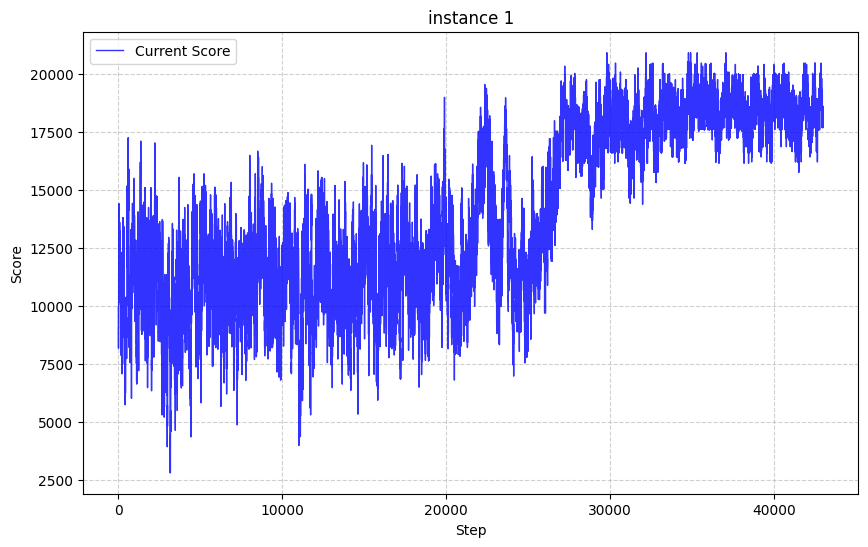

In [38]:
plot_algorithm_run("instance 1",history)